#### Student Name: Mai Ngo
#### Course Name and Number: DSC 478 Programming Machine Learning Applications
#### Assignment 3
#### Date: 5/21/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [2]:
def cosineDistance (instance1, instance2):
    '''Return Cosine similarity distance between two instance.'''
        
    instance1_norm = np.linalg.norm(instance1)
    instance2_norm = np.linalg.norm(instance2)
    #Find the vector norm for each instance.       
    cosine = np.dot(instance1, instance2)/(instance1_norm * instance2_norm)
    #Compute Cosine: divide the dot product of the predicted instance versus each document instance in trainData by the product of the two norms.
    cosineDist = 1 - cosine
    #Cosine distance measure will be the inverse of Cosine similarity.
    return cosineDist    

b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset. Next, as in the previous assignment, perform TFxIDF transformation on these data sets.

In [3]:
#Import all documents as numpy array.
matrix = np.loadtxt('matrix.txt', delimiter=',', dtype=int)
classes = np.loadtxt('classes.txt', delimiter=' ', dtype=int, skiprows=1, usecols=(1))
terms = np.loadtxt('terms.txt', dtype=str)

In [4]:
#We have 9328 terms and 2500 documents.
doc_termMatrix = matrix.T
#Transpose to document-term matrix. 
print(f'Document-term Matrix shape: {doc_termMatrix.shape}')
print(f'Classes shape: {classes.shape}')
print(f'Terms shape: {terms.shape}')

Document-term Matrix shape: (2500, 9328)
Classes shape: (2500,)
Terms shape: (9328,)


In [5]:
#Split the data into train and test sets (80%, 20%).
from sklearn.model_selection import train_test_split
trainSet, testSet, trainTarget, testTarget = train_test_split(doc_termMatrix, classes, test_size=0.2, random_state=26)

print(trainSet.shape)
trainSet[0:5]

(2000, 9328)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
print(testSet.shape)
testSet[0:5]

(500, 9328)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [7]:
term_document_trainSet = trainSet.T
term_document_testSet = testSet.T
#Convert train and test data to term-document matrix for TF-IDF. 
dfTrain = np.count_nonzero(term_document_trainSet, axis=1).reshape(-1, 1)
dfTest = np.count_nonzero(term_document_testSet, axis=1).reshape(-1, 1)
print(dfTrain[:10])
print("\n")

print(dfTest[:10])
print("\n")
#Work with term-document matrix.
#Get document frequency df for each term in both test and train data. 
#Double check. False = contains 0 value. 
print(f"Test set does not have 0 value: {all(dfTest)}")
print(f"Train set does not have 0 value: {all(dfTrain)}")

[[  5]
 [  4]
 [ 20]
 [  9]
 [ 11]
 [  6]
 [ 27]
 [  3]
 [ 46]
 [145]]


[[ 5]
 [ 2]
 [ 2]
 [ 0]
 [ 2]
 [ 3]
 [ 3]
 [ 0]
 [10]
 [27]]


Test set does not have 0 value: False
Train set does not have 0 value: False


In [8]:
#Add 1 to zero values.
train_zeroVal = np.where(dfTrain == 0)[0]
dfTrain[train_zeroVal] += 1

test_zeroVal = np.where(dfTest == 0)[0]
dfTest[test_zeroVal] += 1

In [9]:
#Create base matrix for both test and train data.    
trainNDocs = term_document_trainSet.shape[1]
MatrixTD_train=np.ones(np.shape(term_document_trainSet), dtype=float)*trainNDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(MatrixTD_train)
print("\n")

testNDocs = term_document_testSet.shape[1]
MatrixTD_test=np.ones(np.shape(term_document_testSet), dtype=float)*testNDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(MatrixTD_test)

[[2000. 2000. 2000. ... 2000. 2000. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]
 ...
 [2000. 2000. 2000. ... 2000. 2000. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]
 [2000. 2000. 2000. ... 2000. 2000. 2000.]]


[[500. 500. 500. ... 500. 500. 500.]
 [500. 500. 500. ... 500. 500. 500.]
 [500. 500. 500. ... 500. 500. 500.]
 ...
 [500. 500. 500. ... 500. 500. 500.]
 [500. 500. 500. ... 500. 500. 500.]
 [500. 500. 500. ... 500. 500. 500.]]


In [10]:
#Convert to IDF values for both test and train data.
import warnings
warnings.filterwarnings('ignore')
IDF_train = np.log2(np.divide(MatrixTD_train, dfTrain))
print(IDF_train)
print("\n")

IDF_test = np.log2(np.divide(MatrixTD_test, dfTest))
print(IDF_test)

[[ 8.64  8.64  8.64 ...  8.64  8.64  8.64]
 [ 8.97  8.97  8.97 ...  8.97  8.97  8.97]
 [ 6.64  6.64  6.64 ...  6.64  6.64  6.64]
 ...
 [10.97 10.97 10.97 ... 10.97 10.97 10.97]
 [10.97 10.97 10.97 ... 10.97 10.97 10.97]
 [ 9.38  9.38  9.38 ...  9.38  9.38  9.38]]


[[6.64 6.64 6.64 ... 6.64 6.64 6.64]
 [7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [7.97 7.97 7.97 ... 7.97 7.97 7.97]
 ...
 [7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [7.97 7.97 7.97 ... 7.97 7.97 7.97]
 [8.97 8.97 8.97 ... 8.97 8.97 8.97]]


In [11]:
#Compute the TFxIDF values for each document-term entry for both test and train data.
TFIDF_train = term_document_trainSet * IDF_train
print(TFIDF_train[:10])
print("\n")

TFIDF_test = term_document_testSet * IDF_test
print(TFIDF_test)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   3.79]]


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
#Just double check my TF-IDF conversion is correct. 5th document has four 192th terms. 
print(TFIDF_train[192, 5])
print(IDF_train[192])

0.0
[10.97 10.97 10.97 ... 10.97 10.97 10.97]


c. Perform Kmeans clustering on the transformed training data from part (b). Perform a qualitative analysis of the clusters by examining top features in each cluster and identifying patterns in the data. To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by the cluster DF values for each term, the centroid weights for each term in the top N terms in the cluster (mean TFxIDF weight of the term), and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%).  Here is an example of how this output might look like (here the top 10 terms for some clusters and the data are displayed in decreasing order of cluster DF values).

In [13]:
#Transpose TF-IDF data to document-term. 
TFIDF_train_transpose = TFIDF_train.transpose()
TFIDF_test_transpose = TFIDF_test.transpose()

In [14]:
print(f'TF-IDF train: {TFIDF_train_transpose.shape}')
print(f'Original train: {trainSet.shape}')
print(f'TF-IDF test: {TFIDF_test_transpose.shape}')
print(f'Original test: {testSet.shape}')
print(f'Terms: {terms[:10]}')

TF-IDF train: (2000, 9328)
Original train: (2000, 9328)
TF-IDF test: (500, 9328)
Original test: (500, 9328)
Terms: ['aa' 'aargh' 'aaron' 'aaronc' 'ab' 'abandon' 'abc' 'abid' 'abil' 'abl']


#### Perform Kmeans clustering use the kMeans module form Ch. 10 of MLA. Using TF-IDF training data. 

In [15]:
from numpy import *
def distEuclid(instance1, instance2):
    '''Calculate Euclidean distance between two vectors.'''
    return sqrt(sum(power(instance1 - instance2, 2)))

def randCent(dataSet, k):
    '''Creates a set of k random centroids.'''
    
    nTerms = shape(dataSet)[1]
    #Get total number of terms. 
    centroids = zeros((k,nTerms), dtype=float)
    #Create a numpy array of k clusters (rows), # of terms (columns) to store random centroids. 
    for t in range(nTerms): 
    #Create random cluster centers. Iterate through each term.
        minTerm = min(TFIDF_train_transpose[:,t])
        #Get the smallest value within t term column.  
        rangeTerm = float(max(TFIDF_train_transpose[:,t]) - minTerm)
        #Get the range within t term column. 
        centroids[:,t] = minTerm + rangeTerm * random.rand(k)
        #Generates a 1-D array of k random values between 0 and 1. Rescale to fit within the range of the t term column     
        #Assign the rescaled values as centroid values for the corresponding t term.
    
    return centroids 

def kMeans(dataSet, k, distMeas=cosineDistance, createCent=randCent):
    '''kMeans function.'''
    
    nDocs = shape(dataSet)[0]
    #Get total number of documents. 
    clusterAssment = zeros((nDocs,2))
    #Create matrix to store nearest centroid index, and Standard Error of each document.
    centroids = createCent(dataSet, k)
    #Initial centroids.
    clusterChanged = True
    #A flag to track clustering process. True = document got assigned to a different cluster, False = no further change. 
    
    while clusterChanged:
    #Keep iterate until no change occur in clustering documents.
        clusterChanged = False
        for doc in range(nDocs): 
        #Iterate through each document.
            minDist = inf; minIndex = -1
            #Assign minIndex: stores index of the nearest centroid. 
            for clusterIndex in range(k):
                distance = distMeas(centroids[clusterIndex,:],dataSet[doc,:])
                #Calculate the distance between doc-th document and each centroid using Euclidean distance.
                if distance < minDist:
                #Find and update the minimum distance aka. nearest centroid. 
                    minDist = distance
                    minIndex = clusterIndex
                    #Assign the document to the cluster with the minimum distance.
                    #Assign index of nearest centroid.
                    
            if clusterAssment[doc,0] != minIndex: clusterChanged = True
            #If current cluster index does not match minIndex, aka. clusterChanged = True. While Loop continues. 
            clusterAssment[doc,:] = minIndex, minDist**2
            #Update to store nearest centroid index and SE for current document.
            
        for centroid in range(k):
        #Re-calculating centroids after initial clustering. 
            clusterPoint = dataSet[nonzero(clusterAssment[:,0]==centroid)[0]]
            #First, check whether nearest centroid index matches with centroid value. Then, retrieve documents with corresponding indicies for each cluster. 
            if(len(clusterPoint)!=0):
                centroids[centroid,:] = mean(clusterPoint, axis=0)
                #Calculate the centroid for a cluster = mean value of the data points in that cluster. 
    return centroids, clusterAssment

In [16]:
centroids, clusterAssment = kMeans(TFIDF_train_transpose, 5, distMeas=cosineDistance, createCent=randCent)

In [17]:
print(f'Centroids: {centroids}')
print(f'Clusters: {clusterAssment}')

Centroids: [[0.02 0.   0.06 ... 0.   0.   0.  ]
 [0.   0.09 0.02 ... 0.   0.   0.  ]
 [0.04 0.   0.58 ... 0.   0.01 0.13]
 [0.   0.   0.   ... 1.57 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
Clusters: [[2.   0.7 ]
 [0.   0.9 ]
 [1.   0.77]
 ...
 [2.   0.72]
 [2.   0.72]
 [1.   0.66]]


To facilitate your analysis of the clusters, write a function to display the top N terms in each cluster sorted by the cluster DF values for each term, the centroid weights for each term in the top N terms in the cluster (mean TFxIDF weight of the term), and the size of the cluster. The cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears (so, if a cluster has 500 documents, and term "game" appears in 100 of those 500 documents, then DF value of "game" in that cluster is 0.2 or 20%).  Here is an example of how this output might look like (here the top 10 terms for some clusters and the data are displayed in decreasing order of cluster DF values).

In [18]:
def clusterAnalysis(centroids, clusterAssment, n_topTerms, dataSet, terms):
    
    numClusters = centroids.shape[0]
    numTerms = centroids.shape[1]

    for clusterIndex in range(numClusters):
        clusterSize = len(dataSet[clusterAssment[:, 0] == clusterIndex])
        #Cluster size = number of documents within a cluster. 
        #Count any document has the same cluster value (first column) with clusterIndex. 
        clusterTerms = []
        clusterDFValues = []
        centroidWeights = []
        #Initialize 3 lists: terms, DFs, centroid weights.

        for termIndex in range(numTerms):
            term = terms[termIndex]
            clusterDocs = dataSet[clusterAssment[:, 0] == clusterIndex]
            #Pull documents from the original training data within the same cluster. 
            termDF = np.sum(clusterDocs[:, termIndex])
            #Calculate the total occurrence of the current term across all documents within that cluster.  
            centroidWeight = (termDF / clusterSize) * 100
            #Calculate the frequency of the current term across all documents within that cluster. 
            
            clusterTerms.append(term)
            clusterDFValues.append(termDF)
            centroidWeights.append(centroidWeight)
            
        sortedDFValues = sorted(clusterDFValues, reverse=True)
        #Sort by DF values in descending order.
        sortedTerms = [term for _, term in sorted(zip(clusterDFValues, clusterTerms), reverse=True)]
        sortedCentroidWeights = [weight for _, weight in sorted(zip(clusterDFValues, centroidWeights), reverse=True)]
        #Sort terms and centroid weight followed by DF values.
        print(f'Cluster {clusterIndex + 1}')
        print(f'Cluster size: {clusterSize}')
        print(f'Top {n_topTerms} in Cluster {clusterIndex}')
        
        for i in range(min(n_topTerms, len(sortedTerms))):
            term = sortedTerms[i]
            dfValue = sortedDFValues[i]
            centroidWeight = sortedCentroidWeights[i]
            print(f"Term: {term}\tDF Value: {dfValue}\tCentroid Weight: {centroidWeight:.4f}")

        print()

In [19]:
clusterAnalysis(centroids, clusterAssment, 10, trainSet, terms)

Cluster 1
Cluster size: 782
Top 10 in Cluster 0
Term: window	DF Value: 859	Centroid Weight: 109.8465
Term: subject	DF Value: 821	Centroid Weight: 104.9872
Term: file	DF Value: 518	Centroid Weight: 66.2404
Term: do	DF Value: 433	Centroid Weight: 55.3708
Term: sale	DF Value: 365	Centroid Weight: 46.6752
Term: on	DF Value: 336	Centroid Weight: 42.9668
Term: work	DF Value: 299	Centroid Weight: 38.2353
Term: write	DF Value: 294	Centroid Weight: 37.5959
Term: get	DF Value: 294	Centroid Weight: 37.5959
Term: run	DF Value: 277	Centroid Weight: 35.4220

Cluster 2
Cluster size: 402
Top 10 in Cluster 1
Term: game	DF Value: 676	Centroid Weight: 168.1592
Term: team	DF Value: 485	Centroid Weight: 120.6468
Term: plai	DF Value: 417	Centroid Weight: 103.7313
Term: subject	DF Value: 416	Centroid Weight: 103.4826
Term: go	DF Value: 315	Centroid Weight: 78.3582
Term: hockei	DF Value: 308	Centroid Weight: 76.6169
Term: player	DF Value: 292	Centroid Weight: 72.6368
Term: write	DF Value: 287	Centroid Weight:

#### Extra Credit - 5pt: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster.

In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud, ImageColorGenerator

In [22]:
cluster1 = pd.DataFrame(trainSet[clusterAssment[:,0]==0])
cluster2 = pd.DataFrame(trainSet[clusterAssment[:,0]==1])
cluster3 = pd.DataFrame(trainSet[clusterAssment[:,0]==2])
cluster4 = pd.DataFrame(trainSet[clusterAssment[:,0]==3])
cluster5 = pd.DataFrame(trainSet[clusterAssment[:,0]==4])
#Get document clusters.

In [23]:
termsPanda = pd.DataFrame(terms)
#Convert to pandas Dataframe to get index.
terms_array = np.array(termsPanda)
cluster1.columns = terms_array.T[0]
cluster2.columns = terms_array.T[0]
cluster3.columns = terms_array.T[0]
cluster4.columns = terms_array.T[0]
cluster5.columns = terms_array.T[0]
#Assign corresponding term to each cluster columns.

In [24]:
cluster1_termFreq = list(np.array((cluster1.T!=0).sum(1).T))
cluster2_termFreq = list(np.array((cluster2.T!=0).sum(1).T))
cluster3_termFreq = list(np.array((cluster3.T!=0).sum(1).T))
cluster4_termFreq = list(np.array((cluster4.T!=0).sum(1).T))
cluster5_termFreq = list(np.array((cluster5.T!=0).sum(1).T))
#Get term frequency as a list. Sum the value each term row. 

In [25]:
termList = list(terms.T)
cluster1Terms = ""
cluster2Terms = ""
cluster3Terms = ""
cluster4Terms = ""
cluster5Terms = ""

for termIndex, term in enumerate(termList):
    for freqIndex, freq in enumerate([cluster1_termFreq, cluster2_termFreq, cluster3_termFreq, cluster4_termFreq, cluster5_termFreq]):
        for j in range(freq[termIndex]):
            if freqIndex == 0:
                cluster1Terms += term + " "
            elif freqIndex == 1:
                cluster2Terms += term + " "
            elif freqIndex == 2:
                cluster3Terms += term + " "
            elif freqIndex == 3:
                cluster4Terms += term + " "
            elif freqIndex == 4:
                cluster5Terms += term + " "
#Generate a string of terms occurrence in each cluster for plotting.

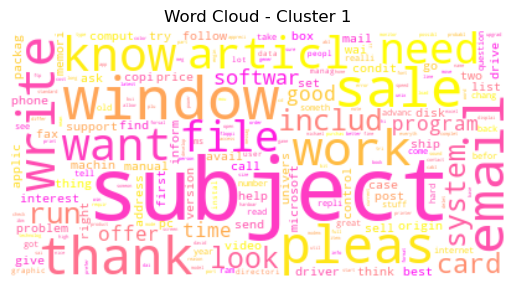

In [26]:
cluster1_wordcloud = WordCloud(background_color='white', max_font_size=70, random_state=33, colormap='spring', collocations=False).generate(cluster1Terms)
plt.imshow(cluster1_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Cluster 1')
plt.axis('off')
plt.show()

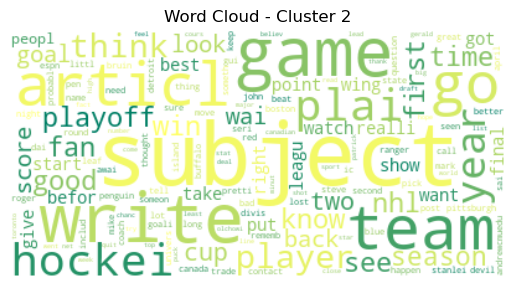

In [27]:
cluster2_wordcloud = WordCloud(background_color='white', max_font_size=70, random_state=100, colormap='summer', collocations=False).generate(cluster2Terms)
plt.imshow(cluster2_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Cluster 2')
plt.axis('off')
plt.show()

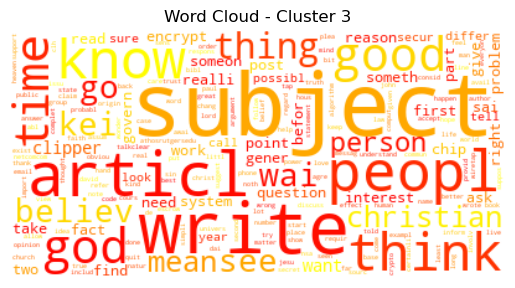

In [28]:
cluster3_wordcloud = WordCloud(background_color='white', max_font_size=70, random_state=26, colormap='autumn', collocations=False).generate(cluster3Terms)
plt.imshow(cluster3_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Cluster 3')
plt.axis('off')
plt.show()

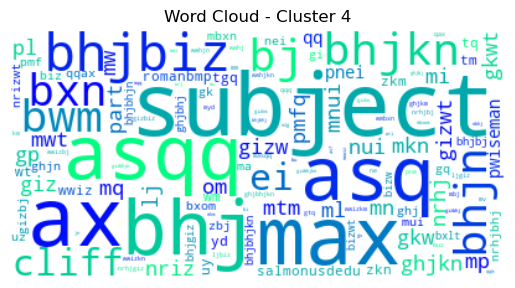

In [29]:
cluster4_wordcloud = WordCloud(background_color='white', max_font_size=70, random_state=26, colormap='winter', collocations=False).generate(cluster4Terms)
plt.imshow(cluster4_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Cluster 4')
plt.axis('off')
plt.show()

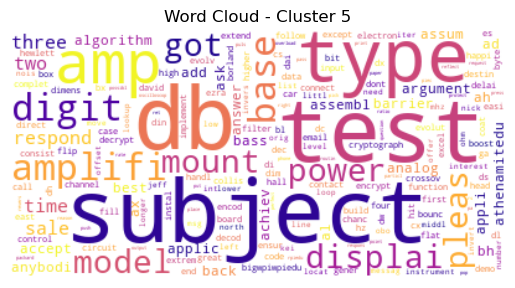

In [30]:
cluster5_wordcloud = WordCloud(background_color='white', max_font_size=70, random_state=26, colormap='plasma', collocations=False).generate(cluster5Terms)
plt.imshow(cluster5_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Cluster 5')
plt.axis('off')
plt.show()

d. Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare your clusters to the re-assigned classes by computing the Completeness and Homogeneity values. You should do this for the best values of k and the best clustering run you settled on in the previous part. 

In [31]:
from sklearn.metrics import completeness_score, homogeneity_score

In [32]:
completeness = completeness_score(trainTarget, np.ravel(clusterAssment.T[0]))
homogeneity = homogeneity_score(trainTarget, np.ravel(clusterAssment.T[0]))

print(f'Completeness of Cluster: {completeness}')
print(f'Homogeneity of Clusters: {homogeneity}')

Completeness of Cluster: 0.8406347870839743
Homogeneity of Clusters: 0.5670314471383875


#### Extra Credit - 5 pts: You can try other clustering runs with values of k between 4 and 8 and in each case compute Completeness and Homogeneity. This experiment will indicate which clustering provides the best representation of the original newsgroup categories.

In [33]:
kPara = [4, 5, 6, 7, 8]
for i, k in enumerate(kPara):
    Centroids, ClusterAssment = kMeans(TFIDF_train_transpose, k, distMeas=cosineDistance, createCent=randCent)
    Completeness = completeness_score(trainTarget, np.ravel(ClusterAssment.T[0]))
    Homogeneity = homogeneity_score(trainTarget, np.ravel(ClusterAssment.T[0]))
    print(f'Completeness of Cluster with k = {kPara[i]}: {Completeness}')
    print(f'Homogeneity of Clusters with k = {kPara[i]}: {Homogeneity}')
    print('\n')

Completeness of Cluster with k = 4: 0.1159392024516169
Homogeneity of Clusters with k = 4: 0.004159303649982975


Completeness of Cluster with k = 5: 0.8406347870839742
Homogeneity of Clusters with k = 5: 0.5670314471383875


Completeness of Cluster with k = 6: 0.8501301756663006
Homogeneity of Clusters with k = 6: 0.8593134049430797


Completeness of Cluster with k = 7: 0.6581869813209043
Homogeneity of Clusters with k = 7: 0.6242607719114046


Completeness of Cluster with k = 8: 0.7005413300047123
Homogeneity of Clusters with k = 8: 0.6262046649519081




e. Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the predicted class label as well as Cosine similarity to the corresponding cluster.

In [34]:
testCluster = []

for doc in testSet:
    values = {}
    similarity = []
    cluster = 0
    for centroid in centroids:
        cluster += 1
        centroid_docSim = 1 - cosineDistance(doc, centroid)
        #Need to subtract from 1 as our function returns distance and not similarity
        similarity.append(centroid_docSim) 
        values[f'Cosine Similarity to Cluster {cluster}'] = centroid_docSim
    values['Predicted Cluster'] = similarity.index(max(similarity))+1
    testCluster.append(values)

testCluster = pd.DataFrame(testCluster)

In [35]:
testCluster.head(20)

,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Cosine Similarity to Cluster 5,Predicted Cluster
0,0.290377,0.052185,0.155065,0.000019,0.001943,1
1,0.243721,0.039232,0.070658,0.000026,0.004690,1
2,0.144115,0.499187,0.148820,0.000032,0.003721,2
3,0.076061,0.282825,0.087216,0.000015,0.000638,2
4,0.133754,0.034389,0.049034,0.000003,0.002446,1
5,0.262570,0.060265,0.099491,0.000070,0.002767,1
6,0.066212,0.273458,0.061196,0.000043,0.000365,2
7,0.114708,0.083570,0.367275,0.000002,0.003163,3
8,0.057250,0.023729,0.065881,0.000000,0.020830,3
9,0.160075,0.049208,0.080356,0.000004,0.002596,1
